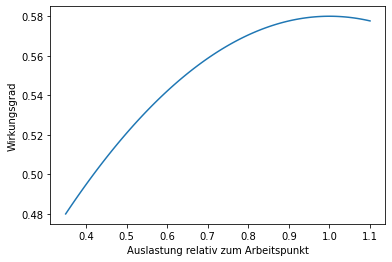

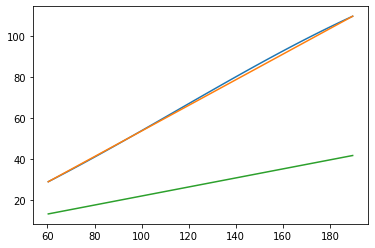

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Input Values
NominalGeneration = 1.0
EfficiencyAtPnom = 0.58
MinimumStableGeneration = 0.35
EfficiencyLoss = 0.10
EfficiencyAtPmin = EfficiencyAtPnom - EfficiencyLoss
PowerMW = 100

# Equation System
# ax1^2 + bx1 + c = y1
# ax2^2 + bx2 + c = y2
# 2ax1 + b = 0

X = np.array([
        [NominalGeneration**2, NominalGeneration, 1], 
        [MinimumStableGeneration**2, MinimumStableGeneration, 1],
        [2 * NominalGeneration, 1, 0]
    ])
y = np.array([EfficiencyAtPnom, EfficiencyAtPmin, 0])

# Solve for coefficients
a = np.linalg.solve(X, y)

# Create Function that calculates Effiiency based on power Input
def calcEff(a, x):
    return a[0] * x**2 + a[1] * x + a[2]

powers = np.linspace(MinimumStableGeneration, 1.1, 100 )
effs = calcEff(a, powers)

# plot Efficiency Curve
fig, ax = plt.subplots()
ax.plot(powers, effs)
ax.set_xlabel("Auslastung relativ zum Arbeitspunkt")
ax.set_ylabel("Wirkungsgrad")

fig2, ax2 = plt.subplots()

PowerIn = PowerMW / EfficiencyAtPnom
powerInRange = powers * PowerIn
powerOutRange = powerInRange * effs
ax2.plot(powerInRange, powerOutRange)
ax2.plot([powerInRange[0] , powerInRange[-1]],[powerOutRange[0], powerOutRange[-1]] )
#ax2.plot(effs * PowerIn)


Text(0, 0.5, 'Produktionskosten in $€/MWh_{elektrisch}$')

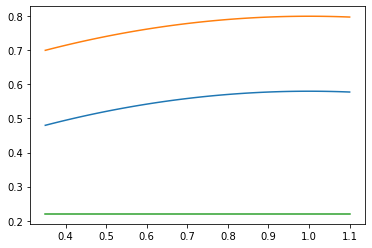

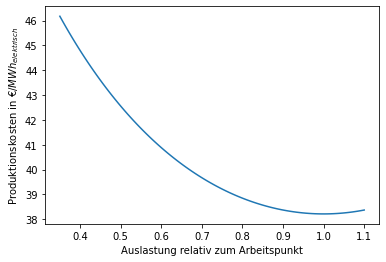

In [38]:

# Input Values
fuelPrice = 12.4 # €/MWh
carbonPrice = 19.1 # €/t

CO2Emissions = 94 # kg/GJ
to_tperMWh = 0.0036 
CO2Emissions = CO2Emissions * to_tperMWh # t/MWh

VariableOM = 3.3 # €/MWh

PowerMW = 100 # MW
P_th_KWK = 40 # MW

totalEff = 0.8

eff_th = totalEff - EfficiencyAtPnom

# Production Cost per Input Energy
ProductionCost_In = CO2Emissions * carbonPrice + VariableOM + fuelPrice
# Production Cost per thermal Energy
powerThermalRange = powerInRange * eff_th
ProductionCost_thermal = ProductionCost_In / eff_th
# Production Cost per electric Energy
ProductionCost_electric = ProductionCost_In / effs

fig, ax = plt.subplots()
ax.plot(powers, effs)
ax.plot(powers, effs + eff_th)
ax.plot(powers, [eff_th,] * len(effs))

fig2, ax2 = plt.subplots()
ax2.plot(powers, ProductionCost_electric)
ax2.set_xlabel("Auslastung relativ zum Arbeitspunkt")
ax2.set_ylabel(r'Produktionskosten in $€/MWh_{elektrisch}$')
#ax.plot(powerInRange, powerOutRange * ProductionCost_electric)
